# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 40


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
# Define variables
units = 'imperial'

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" +  weather_api_key + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Call function to recalculate maximum temperature to farenheight
       # convert_temp(city_max_temp)
       # city_max_temp = int(max_tempF)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | tulum
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | geraldton
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | hofn
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | bengkulu
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | leningradskiy
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | tecoanapa
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | touros
Processing Record 21 of Set 1 | povo

In [4]:
# confirm the request results
city_weather.items()

dict_items([('coord', {'lon': 20.0403, 'lat': -34.5322}), ('weather', [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}]), ('base', 'stations'), ('main', {'temp': 74.43, 'feels_like': 74.91, 'temp_min': 74.43, 'temp_max': 74.43, 'pressure': 1012, 'humidity': 71, 'sea_level': 1012, 'grnd_level': 1003}), ('visibility', 10000), ('wind', {'speed': 5.73, 'deg': 230, 'gust': 7.31}), ('clouds', {'all': 100}), ('dt', 1675581210), ('sys', {'country': 'ZA', 'sunrise': 1675569834, 'sunset': 1675619022}), ('timezone', 7200), ('id', 1015776), ('name', 'Bredasdorp'), ('cod', 200)])

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          36
Lat           36
Lng           36
Max Temp      36
Humidity      36
Cloudiness    36
Wind Speed    36
Country       36
Date          36
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,58.14,95,38,7.54,CL,1675581188
1,tulum,20.2167,-87.4667,68.31,95,24,3.40,MX,1675581189
2,provideniya,64.3833,-173.3000,-2.29,92,93,10.38,RU,1675581189
3,geraldton,-28.7667,114.6000,82.81,61,0,12.66,AU,1675581190
4,rikitea,-23.1203,-134.9692,78.76,77,11,16.13,PF,1675581190


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df.info()
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,58.14,95,38,7.54,CL,1675581188
1,tulum,20.2167,-87.4667,68.31,95,24,3.40,MX,1675581189
2,provideniya,64.3833,-173.3000,-2.29,92,93,10.38,RU,1675581189
3,geraldton,-28.7667,114.6000,82.81,61,0,12.66,AU,1675581190
4,rikitea,-23.1203,-134.9692,78.76,77,11,16.13,PF,1675581190


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

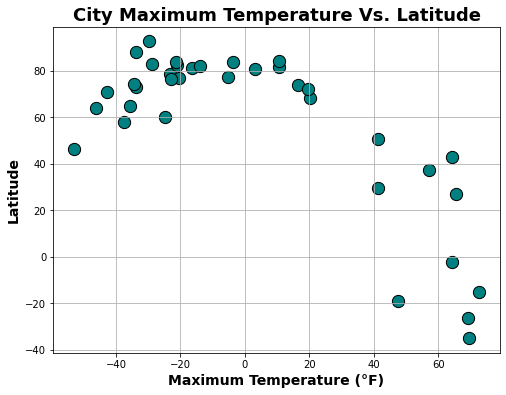

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE


fig1 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Max Temp',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)

# Incorporate the other graph properties
# YOUR CODE HERE
fig1.set_title('City Maximum Temperature Vs. Latitude', fontsize=18, weight='bold')
fig1.set_xlabel('Maximum Temperature (°F)', fontsize=14, weight='bold')
fig1.set_ylabel('Latitude', fontsize=14, weight='bold')
fig1.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

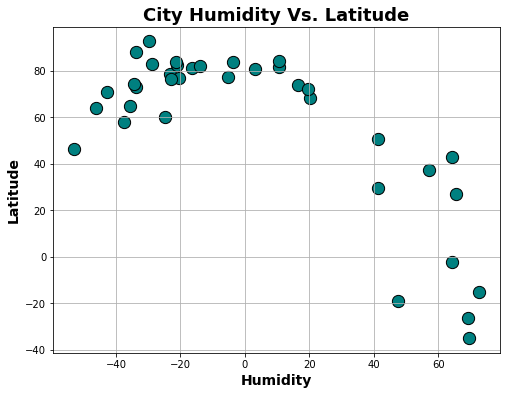

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
fig2 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Max Temp',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)
# Incorporate the other graph properties
# YOUR CODE HERE
fig2.set_title('City Humidity Vs. Latitude', fontsize=18, weight='bold')
fig2.set_xlabel('Humidity', fontsize=14, weight='bold')
fig2.set_ylabel('Latitude', fontsize=14, weight='bold')
fig2.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

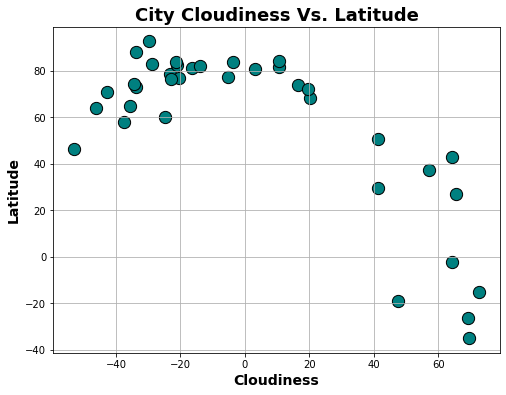

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
fig3 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Max Temp',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)
# Incorporate the other graph properties
# YOUR CODE HERE
fig3.set_title('City Cloudiness Vs. Latitude', fontsize=18, weight='bold')
fig3.set_xlabel('Cloudiness', fontsize=14, weight='bold')
fig3.set_ylabel('Latitude', fontsize=14, weight='bold')
fig3.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

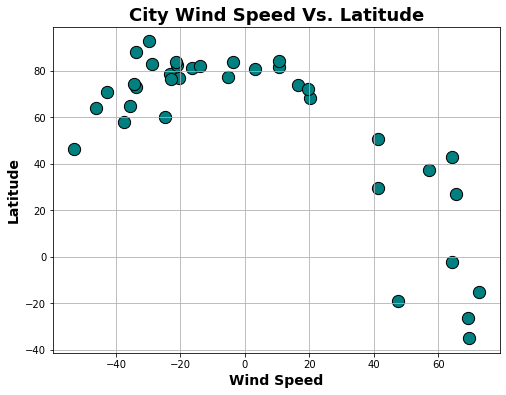

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
fig4 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Max Temp',
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
)
# Incorporate the other graph properties
# YOUR CODE HERE
fig4.set_title('City Wind Speed Vs. Latitude', fontsize=18, weight='bold')
fig4.set_xlabel('Wind Speed', fontsize=14, weight='bold')
fig4.set_ylabel('Latitude', fontsize=14, weight='bold')
fig4.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_plots():

    (slope, intercept, rvalue, pvalue, stderr) = lineregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    m = round(slope,2)
    b = round(intercept,2)
    slope_intercept = f'y = {m}x + {b}'
    fig5 = city_data_df.plot(
                        kind='scatter',
                        x='Lat', y='Max Temp',
                        legend=False, marker='o',
                        figsize=(12,10), s= 150,
                        edgecolor='Black',
                        c='Teal'
    )
    fig5.set_title('City Wind Speed Vs.Latitude', fontsize=18, weight='bold')
    fig5.set_xlabel('Wind Speed', fontsize=14, weight='bold')
    fig5.set_ylabel('Latitude', fontsize=14, weight='bold')
    fig5.grid()
    
    plt.show()   

In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_plot(x_value, Y_value, j):
    
    fig_no = 'fig' + str(j)
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_values = x_value * slope + intercept
    m = round(slope,2)
    b = round(intercept,2)
    slope_intercept = f'y = {m}x + {b}'

    fig_no = city_data_df.plot(
                        kind='scatter',
                        x=x_value, y=y_value,
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
    )
    fig_no.set_title(plot_title, fontsize=18, weight='bold')
    fig_no.set_suptitle(plot_title_sup, fontsize=16, weight='bold')
    fig_no.set_xlabel(plot_xlabel, fontsize=14, weight='bold')
    fig_no.set_ylabel(plot_ylabel, fontsize=14, weight='bold')
    fig_no.grid()
    
    fig_no, slope, intercept, slope_intercept

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tulum,20.2167,-87.4667,68.31,95,24,3.40,MX,1675581189
2,provideniya,64.3833,-173.3000,-2.29,92,93,10.38,RU,1675581189
6,hofn,64.2539,-15.2082,42.71,89,100,38.01,IS,1675581191
7,bethel,41.3712,-73.4140,29.53,61,20,5.75,US,1675581192
9,tasiilaq,65.6145,-37.6368,26.76,94,100,27.02,GL,1675581194


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,58.14,95,38,7.54,CL,1675581188
3,geraldton,-28.7667,114.6000,82.81,61,0,12.66,AU,1675581190
4,rikitea,-23.1203,-134.9692,78.76,77,11,16.13,PF,1675581190
5,vaini,-21.2000,-175.2000,82.56,83,40,9.22,TO,1675581191
8,bengkulu,-3.8004,102.2655,83.62,68,100,11.77,ID,1675581193


###  Temperature vs. Latitude Linear Regression Plot

In [18]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
m = round(slope,2)
b = round(intercept,2)
slope_intercept = f'y = {m}x + {b}'

fig_no = city_data_df.plot(
                        kind='scatter',
                        x=x_value, y=y_value,
                        legend=False, marker='o',
                        figsize=(8,6), s= 150,
                        edgecolor='Black',
                        c='Teal'
    )
fig_no.set_title(plot_title, fontsize=18, weight='bold')
fig_no.set_suptitle(plot_title_sup, fontsize=16, weight='bold')
fig_no.set_xlabel(plot_xlabel, fontsize=14, weight='bold')
fig_no.set_ylabel(plot_ylabel, fontsize=14, weight='bold')
fig_no.grid()

NameError: name 'x_value' is not defined

In [19]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
j = 10    # number figure to avoid plotting confusion
x_value = northern_hemi_df.loc[northern_hemi_df['Lat']]
y_value = northern_hemi_df.loc[northern_hemi_df['Max Temp']]
plot_title = 'Temperature vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Maximum Temperature (°F)'
    ## Function to create plot

create_plot(x_value, y_value, j)
    
plt.show()

KeyError: "None of [Float64Index([20.2167, 64.3833, 64.2539, 41.3712, 65.6145, 57.0531, 69.3833,\n              16.5167, 41.3834, 19.7297, 10.5669, 10.6667, 47.6446,  3.0707,\n              69.7008, 72.7868],\n             dtype='float64', name='City_ID')] are in the [index]"

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Max Temp']
plot_title = 'Temperature vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Maximum Temperature (°F)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()
#x_value, y_value, j

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
j += 1    # number figure to avoid plotting confusion
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Humidity']
plot_title = 'Humidity vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Humidity'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Humidity']
plot_title = 'Humidity vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Humidity'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
j += 1    # number figure to avoid plotting confusion
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Cloudiness']
plot_title = 'Cloudiness vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Cloudiness (oktas)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Cloudiness']
plot_title = 'Cloudiness vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Cloudiness (oktas)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
j += 1    # number figure to avoid plotting confusion
x_value = northern_hemi_df['Lat']
y_value = northern_hemi_df['Wind Speed']
plot_title = 'Wind Speed vs. Latitude Linear Regression Plot'
plot_title_sup = 'Northern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Wind Speed (m/s)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
j += 1
x_value = southern_hemi_df['Lat']
y_value = southern_hemi_df['Wind Speed']
plot_title = 'Cloudiness vs. Latitude Linear Regression Plot'
plot_title_sup = 'Southern Hemisphere'
plot_xlabel = 'Latitude'
plot_ylabel = 'Wind Speed (m/s)'
    ## Function to create plot
create_plot(x_value, y_value, j)
    
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE